In [5]:
using Pkg
Pkg.add("StaticArrays")
Pkg.add("PlotlyJS")

   Resolving package versions...


InterruptException: InterruptException:

In [1]:
using LinearAlgebra;
using StaticArrays;
using PlotlyJS
using Printf


In [2]:
global const C_3::Matrix{Float64} = [cos(2.0*pi/3.0) -sin(2.0*pi/3.0); sin(2.0*pi/3.0) cos(2.0*pi/3.0)]

# Useful C_6 rotation
global const C_6::Matrix{Float64} = [cos(pi/3.0) -sin(pi/3.0); sin(pi/3.0) cos(pi/3.0)]


# Reciprocal and Direct Lattice   R1 and R2 are the basis vectors in the real space ! 
global const R1::Vector{Float64} = [-0.5, -0.5 * sqrt(3.0)]
global const R2::Vector{Float64} = C_3 * R1
global const R3::Vector{Float64} = C_3 * R2;

# Now, the reciprocal lattice 
global const R::Matrix{Float64} = [R1 R2]';
global const G::Matrix{Float64} = 2.0 * pi * inv(R');

global const T1u  = @SArray ComplexF64[0.0 1.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T2u  = @SArray ComplexF64[0.0 0.0 1.0; 0.0 0.0 0.0; 0.0 0.0 0.0]
global const T3u  = @SArray ComplexF64[0.0 0.0 0.0; 0.0 0.0 1.0; 0.0 0.0 0.0];




# Kagome Model
@inline function H_Kagome(k::Vector{Float64}, t1::Float64, t2::Float64, u1::Float64, u2::Float64)
    Φ1::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(kx) + (-t2 + im * u2) * cos(sqrt(3.0) * ky)) 
    Φ2::ComplexF64 = 2.0 * ((-t1 - im * u1) * cos(0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 + im * u2) * cos(-0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 
    Φ3::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(-0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 - im * u2) * cos(0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 

    Φ1 * T1u + Φ2 * T2u + Φ3 * T3u
 end

 @inline function evals(k::Vector{Float64}, t1::Float64, t2::Float64, u1::Float64, u2::Float64)
   kx::Float64 = 0.5 * k[1]; ky::Float64 = 0.5 * k[2]
   Φ1::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(kx) + (-t2 + im * u2) * cos(sqrt(3.0) * ky)) 
   Φ2::ComplexF64 = 2.0 * ((-t1 - im * u1) * cos(0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 + im * u2) * cos(-0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 
   Φ3::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(-0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 - im * u2) * cos(0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 

   H::Matrix{ComplexF64} = Φ1 * T1u + Φ2 * T2u + Φ3 * T3u
   eigvals(Hermitian(H + H'))
end


@inline function eigensystem_kagome(k::Vector{Float64}, t1::Float64, t2::Float64, u1::Float64, u2::Float64)
   kx::Float64 = k[1]; ky::Float64 = k[2]
   Φ1::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(kx) + (-t2 + im * u2) * cos(sqrt(3.0) * ky)) 
   Φ2::ComplexF64 = 2.0 * ((-t1 - im * u1) * cos(0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 + im * u2) * cos(-0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 
   Φ3::ComplexF64 = 2.0 * ((-t1 + im * u1) * cos(-0.5 * kx + 0.5 * sqrt(3.0) * ky) + (-t2 - im * u2) * cos(0.5 * 3.0 * kx + 0.5 * sqrt(3.0) * ky)) 

   H::Matrix{ComplexF64} = Φ1 * T1u + Φ2 * T2u + Φ3 * T3u
   eigen(Hermitian(H + H'))
end

function plot_simple_kagome_bands(;t₁, t₂, u₁, u₂, seedname, kpath, title = Nothing)
    if title == Nothing
        title = seedname
    end
    eks = evals.(kpath, t₁, t₂, u₁, u₂)

    nps_x = size(kpath, 1)
    xs = 1 : nps_x
    
    t1 = PlotlyJS.scatter(x = xs, y = map(e->e[1], eks), mode = "lines", line = attr(color = "purple", width = 4))
    t2 = PlotlyJS.scatter(x = xs, y = map(e->e[2], eks), mode = "lines", line = attr(color = "purple", width = 4))
    t3 = PlotlyJS.scatter(x = xs, y = map(e->e[3], eks), mode = "lines", line = attr(color = "purple", width = 4))
    lo = PlotlyJS.Layout(title = title,
                xaxis_showgrid = true,
                yaxis_showgrid = true,
                plot_bgcolor="rgba(0,0,0,0)",
                xaxis = attr(showgrid = true, showticklabels = false, linecolor = "black", linewidth = 5, showline = true, mirror = true),
                yaxis = attr(showgrid = true, showticklabels = true, linecolor = "black", linewidth = 5, showline = true, mirror = true),
                width = 510, 
                height = 510,
                showlegend = false)
    
    p = PlotlyJS.plot([t1, t2, t3], lo)
    #PlotlyJS.savefig(p, assets_dir * seedname * ".png")
    display(p)
end

global const cK::SVector{2, Float64} = SVector{2, Float64}([4.188790, 0.0])
global const cK_I::SVector{2, Float64} = @SVector [2.094395, 3.627599]
# Now, the K-Points 
global const high_symmetry_points = Dict{String, SVector{2, Float64}}(
    "K"=> cK, 
    "M"=> (cK + cK_I) / 2.0,
    "Γ"=> [0.0, 0.0] 
)


Dict{String, SVector{2, Float64}} with 3 entries:
  "M" => [3.14159, 1.8138]
  "Γ" => [0.0, 0.0]
  "K" => [4.18879, 0.0]

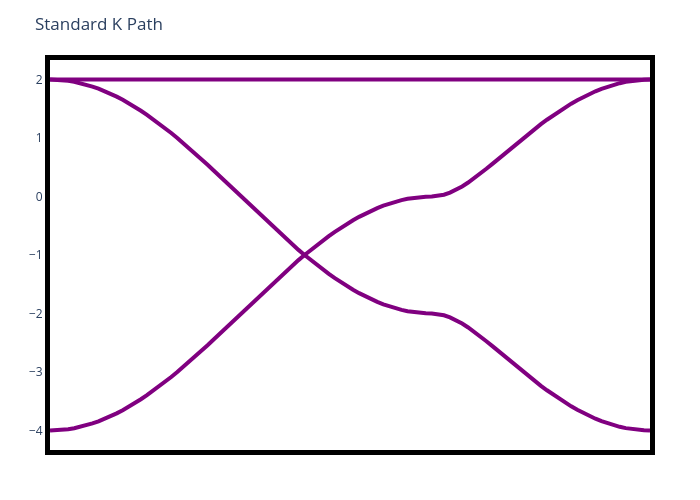

In [3]:
let nps::Int = 100, t₁ = 1.0, t₂ = 0.0, u₁ = 0.0, u₂ = 0.0
        
    kpath_nodes::Vector{SVector{2, Float64}} = [high_symmetry_points["Γ"], 
                    high_symmetry_points["K"], 
                    high_symmetry_points["M"], 
                    high_symmetry_points["Γ"]];
    kpath_fbz::Vector{Vector{Float64}} = interpolate(kpath_nodes, nps);
    kpath_fbz = [SVector{2, Float64}(v) for v ∈ kpath_fbz]
    plot_simple_kagome_bands(;t₁ = t₁, t₂ = t₂, u₁ = u₁, u₂ = u₂, seedname = "Standard K Path", kpath = kpath_fbz, title = Nothing)
end
